In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing

In [58]:
# show plots in the notebook
%matplotlib inline
#%matplotlib 

In [4]:
# Loading the feature vectors 
X=pd.read_csv('/data/X.csv')
Y=pd.read_csv('/data/Y.csv')

In [5]:
# print X.describe()
print X.shape
Y=Y['class']
# print Y.describe()
print Y.shape

(20659, 565)
(20659,)


In [6]:
# processing categorical data
cat_names=['position']

#defing a dummy variable for the position category 
dummy_position=pd.get_dummies(X['position'].fillna('NA'), prefix='position')

#replacing position column with position dummy variables
X = X.drop('position', 1)
X=X.join(dummy_position)

print X.shape

(20659, 566)


In [7]:
Xcolumns=list(X.columns.values)
#print Xcolumns

In [8]:
# Normalizing the data
scaler = preprocessing.StandardScaler().fit(X)

In [9]:
X=pd.DataFrame(scaler.transform(X), columns=Xcolumns)


# aading the interception point
X['intercept']=1
print X.shape

(20659, 567)


In [10]:
#print list(X.columns.values)

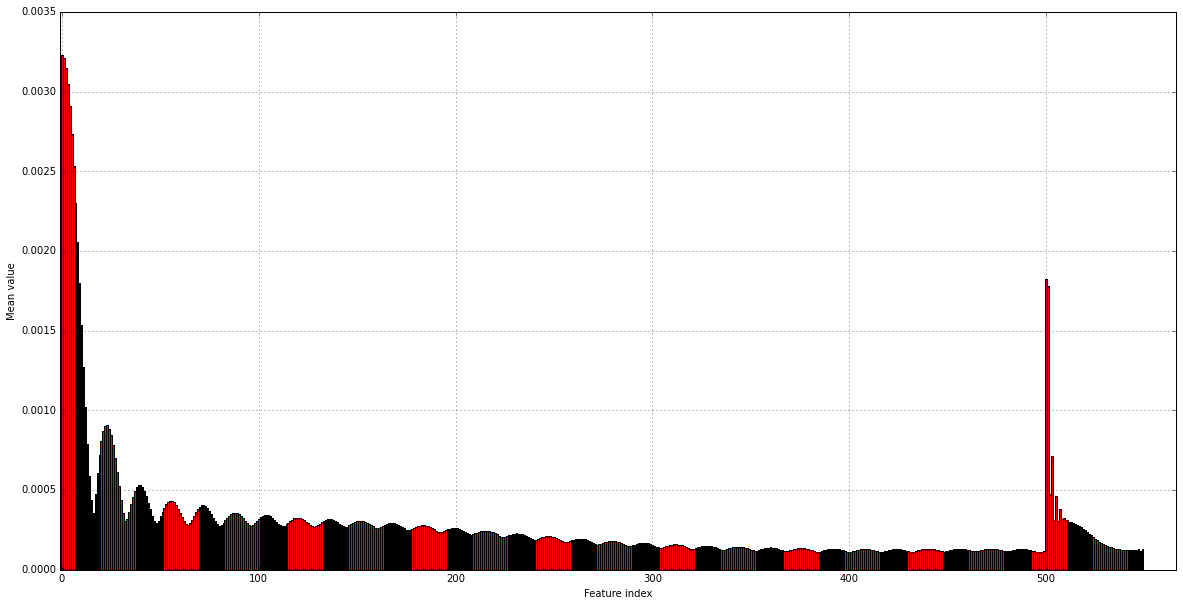

In [59]:
I=scaler.mean_
# Plot the feature importances of the forest
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.bar(range(len(I[:550])), abs(I[:550]),color="r", align="center")
plt.xlim([-1, len(I)])
plt.xlabel('Feature index')
plt.ylabel('Mean value')
plt.grid()
plt.show()

(566,)


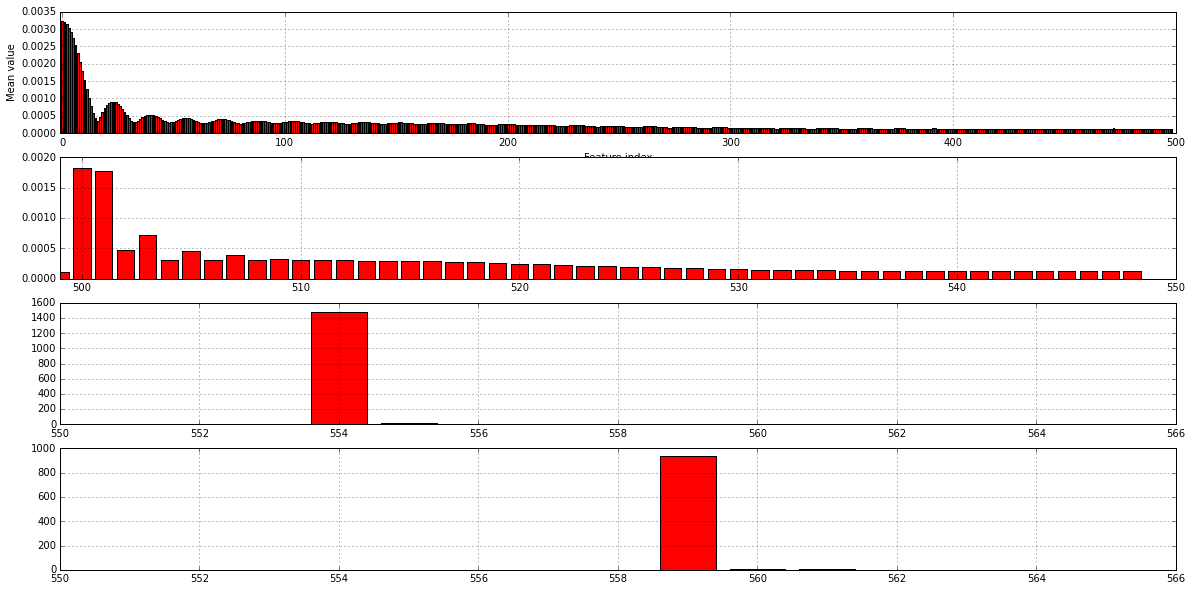

In [12]:
I=scaler.mean_
# Plot the feature mean value
print I.shape
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.subplot(4,1,1)
plt.bar(range(len(I[:499])), abs(I[:499]),color="r", align="center")
plt.xlim([-1, 500])
plt.xlabel('Feature index')
plt.ylabel('Mean value')
plt.grid()

plt.subplot(4,1,2)
plt.bar(range(499,499+len( I[499:549])), abs(I[499:549]),color="r", align="center")
plt.xlim([499, 550])
plt.grid()

plt.subplot(4,1,3)
plt.bar(range(550,550+len(I[550:558])), abs(I[550:558]),color="r", align="center")
plt.xlim([550, len(I)])
plt.grid()

plt.subplot(4,1,4)
plt.bar(range(559,559+len(I[559:])), abs(I[559:]),color="r", align="center")
plt.xlim([550, len(I)])
plt.grid()

plt.show()

In [13]:
# classification target classes
target_names = ['Pad', 'Knuckle']

In [14]:
#Splitting data into train and test set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [20]:
# Logistic Regression Classifier
clf_LR=LogisticRegression()

# Tuning parameters
tune_parameters = [{'C': [0.1, 1, 5, 10]}]

# Tuning over parameters
clf_LR=GridSearchCV(clf_LR, tune_parameters, cv=10)

In [21]:
#Training the LR model
clf_LR.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.1, 1, 5, 10]}], pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [22]:
clf_LR.best_params_

{'C': 10}

In [23]:
clf_LR.grid_scores_

[mean: 0.92685, std: 0.00662, params: {'C': 0.1},
 mean: 0.92763, std: 0.00634, params: {'C': 1},
 mean: 0.92782, std: 0.00705, params: {'C': 5},
 mean: 0.92848, std: 0.00683, params: {'C': 10}]

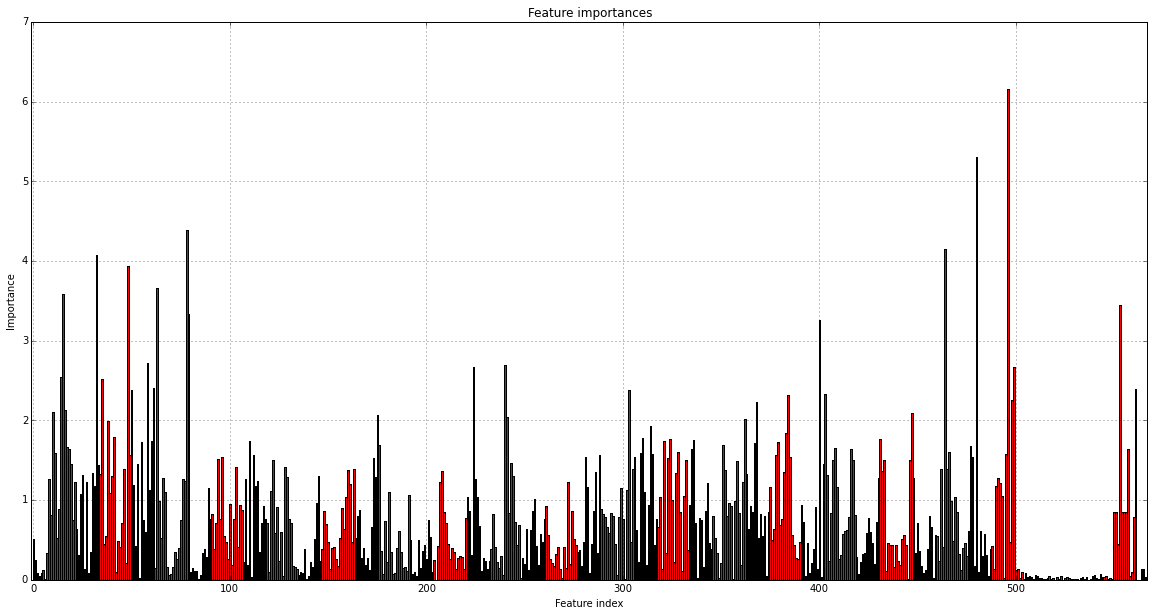

In [60]:
I=clf_LR.best_estimator_.coef_[0]

# Plot the feature importances
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(len(I)), abs(I),color="r", align="center")
plt.xlim([-1, len(I)])
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.grid()
plt.show()

In [25]:
Y_train_pred = clf_LR.predict(X_train)
Y_test_pred  = clf_LR.predict(X_test)
print Y_test_pred.shape

(4132,)


In [26]:
cr=metrics.classification_report(Y_train, Y_train_pred, target_names=target_names)
print(cr)

             precision    recall  f1-score   support

        Pad       0.93      0.94      0.93      8324
    Knuckle       0.93      0.93      0.93      8203

avg / total       0.93      0.93      0.93     16527



In [56]:
cr=metrics.classification_report(Y_test, Y_test_pred, target_names=target_names)
print(cr)

             precision    recall  f1-score   support

        Pad       0.92      0.94      0.93      2080
    Knuckle       0.94      0.91      0.93      2052

avg / total       0.93      0.93      0.93      4132



In [27]:
# Random Forest Classification
clf_RF=RandomForestClassifier()

# Tuning parameter
tune_parameters_RF={'n_estimators':[20, 50,  70]}

clf_RF=GridSearchCV(clf_RF, tune_parameters_RF, cv=10)

In [28]:
clf_RF = clf_RF.fit(X_train, Y_train)

In [29]:
clf_RF.grid_scores_

[mean: 0.92939, std: 0.00548, params: {'n_estimators': 20},
 mean: 0.93387, std: 0.00548, params: {'n_estimators': 50},
 mean: 0.93659, std: 0.00716, params: {'n_estimators': 70}]

In [30]:
clf_RF.best_params_

{'n_estimators': 70}

In [62]:
I=clf_RF.best_estimator_.feature_importances_

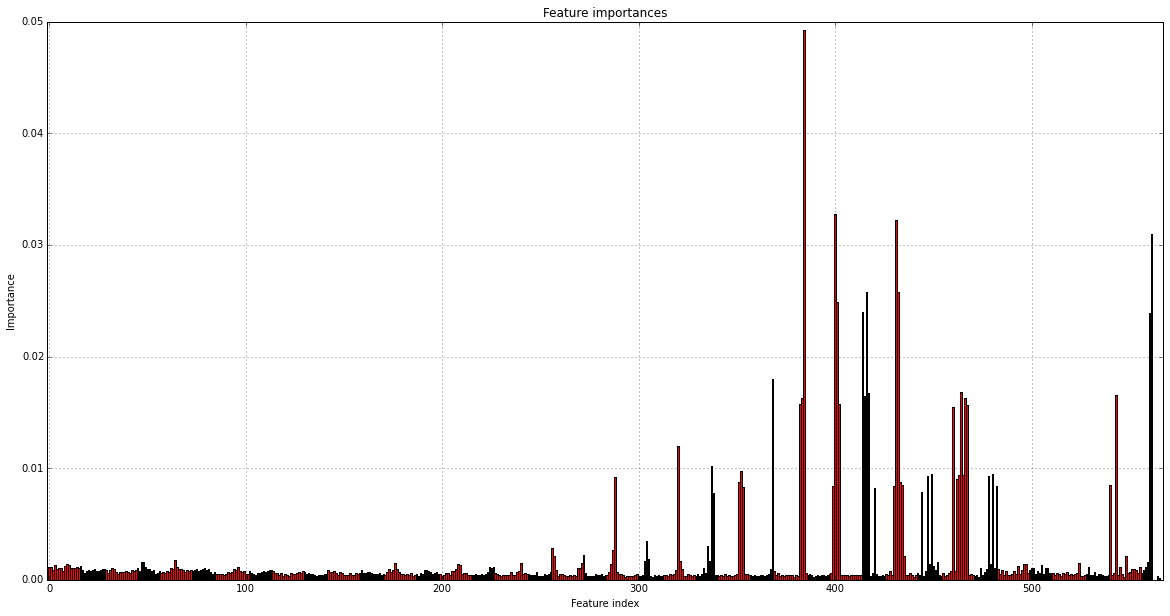

In [63]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(len(I)), I,color="r", align="center")
plt.xlim([-1, len(I)])
plt.xlabel('Feature index')
plt.ylabel('Importance')
plt.grid()
plt.show()

In [56]:
Xcolumns=list(X.columns.values)
print X.shape
print Xcolumns

(20659, 567)
['FFT1', 'FFT2', 'FFT3', 'FFT4', 'FFT5', 'FFT6', 'FFT7', 'FFT8', 'FFT9', 'FFT10', 'FFT11', 'FFT12', 'FFT13', 'FFT14', 'FFT15', 'FFT16', 'FFT17', 'FFT18', 'FFT19', 'FFT20', 'FFT21', 'FFT22', 'FFT23', 'FFT24', 'FFT25', 'FFT26', 'FFT27', 'FFT28', 'FFT29', 'FFT30', 'FFT31', 'FFT32', 'FFT33', 'FFT34', 'FFT35', 'FFT36', 'FFT37', 'FFT38', 'FFT39', 'FFT40', 'FFT41', 'FFT42', 'FFT43', 'FFT44', 'FFT45', 'FFT46', 'FFT47', 'FFT48', 'FFT49', 'FFT50', 'FFT51', 'FFT52', 'FFT53', 'FFT54', 'FFT55', 'FFT56', 'FFT57', 'FFT58', 'FFT59', 'FFT60', 'FFT61', 'FFT62', 'FFT63', 'FFT64', 'FFT65', 'FFT66', 'FFT67', 'FFT68', 'FFT69', 'FFT70', 'FFT71', 'FFT72', 'FFT73', 'FFT74', 'FFT75', 'FFT76', 'FFT77', 'FFT78', 'FFT79', 'FFT80', 'FFT81', 'FFT82', 'FFT83', 'FFT84', 'FFT85', 'FFT86', 'FFT87', 'FFT88', 'FFT89', 'FFT90', 'FFT91', 'FFT92', 'FFT93', 'FFT94', 'FFT95', 'FFT96', 'FFT97', 'FFT98', 'FFT99', 'FFT100', 'FFT101', 'FFT102', 'FFT103', 'FFT104', 'FFT105', 'FFT106', 'FFT107', 'FFT108', 'FFT109', 'FFT

In [66]:
zip(range(len(Xcolumns)), Xcolumns,I)

[(0, 'FFT1', 0.0011447421103554869),
 (1, 'FFT2', 0.0011766729934635848),
 (2, 'FFT3', 0.00090266452790788057),
 (3, 'FFT4', 0.0013425168068227405),
 (4, 'FFT5', 0.00093749019906014871),
 (5, 'FFT6', 0.0010564482533629378),
 (6, 'FFT7', 0.0010558703785602101),
 (7, 'FFT8', 0.00080543715022766862),
 (8, 'FFT9', 0.0012755956959766661),
 (9, 'FFT10', 0.0014558742690182177),
 (10, 'FFT11', 0.0013615460944848951),
 (11, 'FFT12', 0.0010420213379095276),
 (12, 'FFT13', 0.0010303165194430015),
 (13, 'FFT14', 0.0010525537276891992),
 (14, 'FFT15', 0.001157951928344665),
 (15, 'FFT16', 0.0010694702392425506),
 (16, 'FFT17', 0.0012440425320397578),
 (17, 'FFT18', 0.00084387573699534887),
 (18, 'FFT19', 0.00060282049393410217),
 (19, 'FFT20', 0.0007960892926876515),
 (20, 'FFT21', 0.00085919149756100534),
 (21, 'FFT22', 0.00081164156584161498),
 (22, 'FFT23', 0.00089100187863308945),
 (23, 'FFT24', 0.00093945492561691693),
 (24, 'FFT25', 0.00081901809332463992),
 (25, 'FFT26', 0.000821440114764625

In [33]:
Y_train_pred = clf_RF.predict(X_train)
Y_test_pred  = clf_RF.predict(X_test)
print Y_test_pred.shape

(4132,)


In [34]:
cr=metrics.classification_report(Y_train, Y_train_pred, target_names=target_names)
print cr

             precision    recall  f1-score   support

        Pad       1.00      1.00      1.00      8324
    Knuckle       1.00      1.00      1.00      8203

avg / total       1.00      1.00      1.00     16527



In [35]:
cr=metrics.classification_report(Y_test, Y_test_pred, target_names=target_names)
print cr

             precision    recall  f1-score   support

        Pad       0.93      0.95      0.94      2080
    Knuckle       0.95      0.92      0.94      2052

avg / total       0.94      0.94      0.94      4132



In [36]:
# Support Vector Machine classification
clf_SVM = SVC(kernel='linear' ,degree=1)

In [37]:
clf_SVM = clf_SVM.fit(X_train, Y_train)

In [38]:
Y_train_pred = clf_SVM.predict(X_train)
Y_test_pred  = clf_SVM.predict(X_test)
print Y_test_pred.shape

(4132,)


In [39]:
cr=metrics.classification_report(Y_train, Y_train_pred, target_names=target_names)
print cr

             precision    recall  f1-score   support

        Pad       0.93      0.94      0.94      8324
    Knuckle       0.94      0.93      0.93      8203

avg / total       0.93      0.93      0.93     16527



In [40]:
cr=metrics.classification_report(Y_test, Y_test_pred, target_names=target_names)
print cr

             precision    recall  f1-score   support

        Pad       0.92      0.94      0.93      2080
    Knuckle       0.94      0.92      0.93      2052

avg / total       0.93      0.93      0.93      4132

